In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf

In [13]:
ticker_symbol = 'BTC-USD'
data = yf.download(ticker_symbol, start='2023-06-28', end='2024-06-28')

[*********************100%***********************]  1 of 1 completed


In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-28,30696.560547,30703.279297,29921.822266,30086.246094,30086.246094,14571500779
2023-06-29,30086.187500,30796.250000,30057.203125,30445.351562,30445.351562,13180860821
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042


In [15]:
df = data[['Close']]

In [16]:
df.head()

,Close
Date,
2023-06-28,30086.246094
2023-06-29,30445.351562
2023-06-30,30477.251953
2023-07-01,30590.078125
2023-07-02,30620.769531


## Plotting

<Axes: xlabel='Date'>

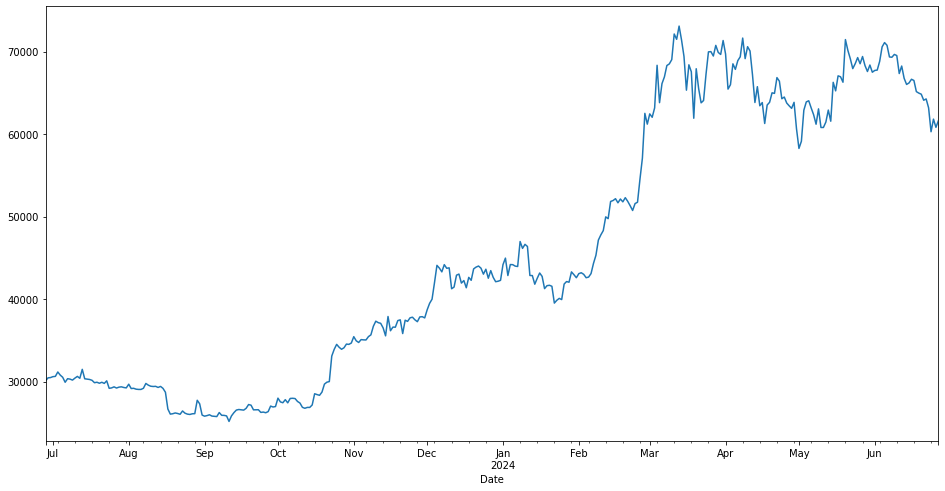

In [8]:
plt.figure(figsize = (16,8))
df['Close'].plot()

In [17]:
# Assuming your DataFrame is named df
df = df.reset_index()

# Rename columns as needed for Prophet
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [18]:
df.head()

,ds,y
0,2023-06-28,30086.246094
1,2023-06-29,30445.351562
2,2023-06-30,30477.251953
3,2023-07-01,30590.078125
4,2023-07-02,30620.769531


In [19]:
# Fit the model
model = Prophet()
model.fit(df)

10:28:39 - cmdstanpy - INFO - Chain [1] start processing
10:28:41 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Create a dataframe for future dates (for example, next 10 days)
future = model.make_future_dataframe(periods=10)

# Predict future values
forecast = model.predict(future)

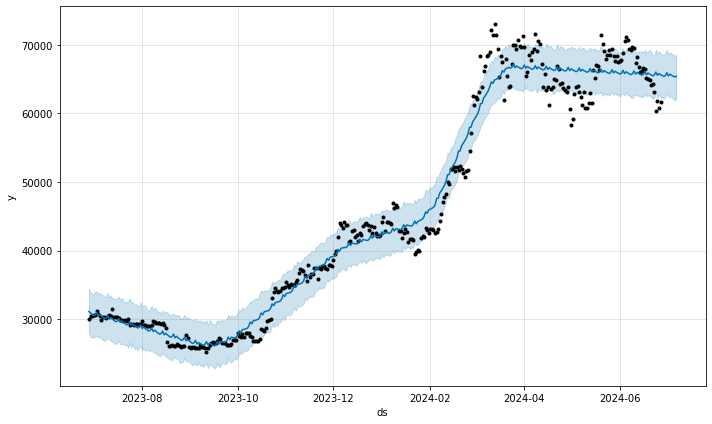

In [22]:
# Plot forecast
model.plot(forecast)
plt.show()

- The Black dots are the original closing price
- The Blue line is the forecasting result from Prophet
- The light blue area around the blue line is the uncertainty interval